# <font color="880000">Lecture Support: Solow Growth Model Simulator: 2020-01-23</font>

In [1]:
# prepare the python environment with the numerical
# analysis package (np), the database package (pd), &
# the matlab clone plotting package (plt):

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# SET PARAMETERS, INITIAL CONDITIONS, AND SCENARIO LENGTH IN THIS CELL
#
# THESE ARE ALL QUANTITIES YOU CAN CHANGE AT WILL
#
# choose the model parameters:
n = 0.01 # the labor-force L proportional growth rate
g = 0.02 # the labor-efficiency E proportional growth rate
s = 0.12 # the share of production Y that is saved and invested
δ = 0.03 # the capital depreciation rate
θ = 1.09 # the elasticitiy of production Y with respect to capital 
         # intensity κ
         #
         # additional variables in the model: output per worker y; the
         # capital stock K

# choose starting values L_0, E_0, and κ_0 for the labor force, labor
# efficiency, and capital intensity:
L_0 = 1
E_0 = 1
κ_0 = 8
        
# choose the length of time for which the simulation will run:
T = 300



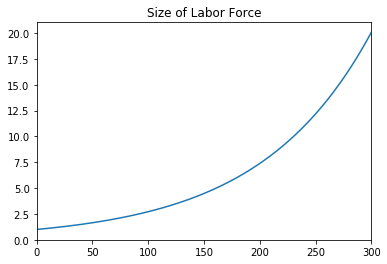

In [3]:
# initialize the list of labor force values:
L = [L_0]

# calculate the labor force for the duration of the
# simulation:
for t in range(T):
    L = L + [L[t]*np.exp(n)]

# initialize the dataframe:
solow_df = pd.DataFrame()

# stuff the list of labor-force values into the dataframe:
solow_df['L'] = L

# plot the labor force over time
solow_df.L.plot()

# set the y-axis minimum to zero, title the plot,
# & tell python to show the plot:
plt.ylim(bottom=0)
plt.title('Size of Labor Force')
plt.show()

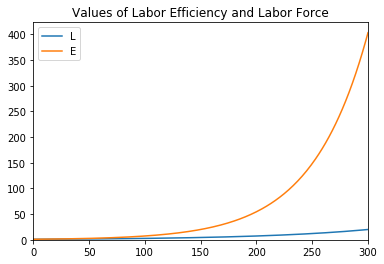

In [4]:
# initialize the list of labor efficiency values:
E = [E_0]

# calculate labor efficiency for the duration of the
# simulation:
for t in range(T):
    E = E + [E[t]*np.exp(g)]

# stuff the list of labor-efficiency values into the dataframe:
solow_df['E'] = E

# plot the L and E values in the dataframe over time:
solow_df[['L','E']].plot()

# set the y-axis minimum to zero, title the plot,
# & tell python to show the plot:
plt.ylim(bottom=0)
plt.title('Values of Labor Efficiency and Labor Force')
plt.show()

**Memo**:

The definition of capital intensity: $ \kappa = \frac{K}{Y} $   
The proportional growth rate of output: $ g_Y = \theta g_{\kappa} + n + g $    
The change in the capital stock: $ \frac{dK}{dt} = sY - \delta K  $   
The proportional growth rate of the capital stock: $ g_{K} =  \frac{1}{K} \frac{dK}{dt} = s\frac{Y}{K} - \delta = \frac{s}{\kappa} - \delta  $    
The proportional growth rate of capital intensity is: $ g_\kappa = g_K - g_Y

So the proportional rate of growth of capital-intensity $ \kappa $ is:

>$ g_\kappa = \left(  \frac{s}{\kappa} - \delta \right)   - \left(  \theta g_{\kappa} + n + g \right) $

> $ (1+\theta) g_\kappa = \frac{s}{\kappa} - \delta - n - g $

>$ g_\kappa  = \frac{s/\kappa - (n+g+\delta)}{1+\theta} $







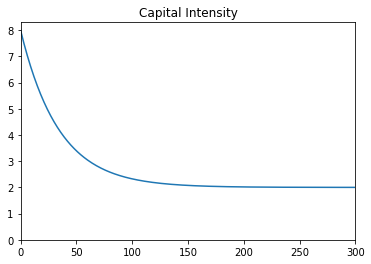

In [5]:
# initialize the list of capital-intensity values:
κ = [κ_0]

# calculate capital intensity for the duration of the
# simulation:
for t in range(T):
    κ = κ + [κ[t]*(1 + (s/κ[t] - (n+g+δ))/(1+θ))]
    
# stuff the list of capital-intensity values into the dataframe:
solow_df['κ'] = κ

# plot capital intensity:
solow_df.κ.plot()

# set the y-axis minimum to zero, title the plot,
# & tell python to show the plot:
plt.ylim(bottom=0)
plt.title('Capital Intensity')
plt.show()

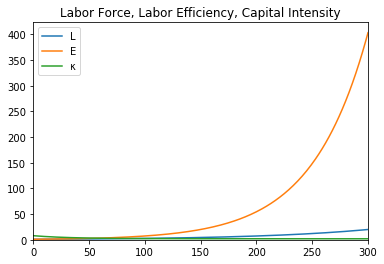

In [6]:
# show the three variables calculated so far over time:
solow_df[['L','E', 'κ']].plot()

# set the y-axis minimum to zero, & tell python to show the plot:
plt.ylim(bottom=0)
plt.title('Labor Force, Labor Efficiency, Capital Intensity')
plt.show()

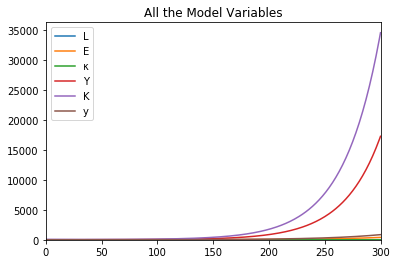

In [7]:
# calculate the remaining variables in the model

# initialize the lists of values:
Y = []
K = []
y = []

# calculate the variables for the duration of the
# simulation:
for t in range(T+1):
    Y = Y + [(κ[t]**θ)*L[t]*E[t]]
    K = K + [(κ[t]*Y[t])]
    y = y + [Y[t]/L[t]]

# stuff the lists of values into the dataframe:
solow_df['Y'] = Y
solow_df['K'] = K
solow_df['y'] = y

# plot the entire dataframe:
solow_df.plot()

# set the y-axis minimum to zero, title the plot,
# & tell python to show the plot:
plt.ylim(bottom=0)
plt.title('All the Model Variables')
plt.show()

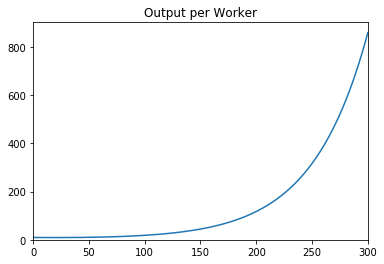

In [8]:
# show output per worker:
solow_df.y.plot()
# set the y-axis minimum to zoero, & tell python to show the plot:
plt.ylim(bottom=0)
plt.title('Output per Worker')
plt.show()

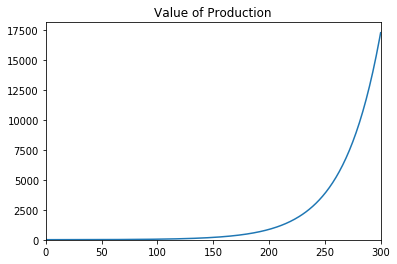

In [9]:
# show output:
solow_df.Y.plot()
# set the y-axis minimum to zero, title the plot,
# & tell python to show the plot:
plt.ylim(bottom=0)
plt.title('Value of Production')
plt.show()

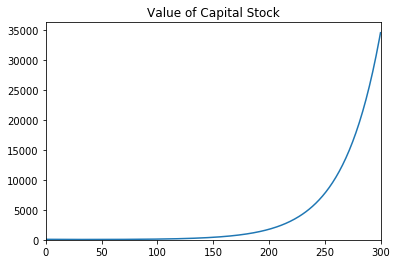

In [10]:
# show the capital stock:
solow_df.K.plot()
# set the y-axis minimum to zero, title the plot,
# & tell python to show the plot:
plt.ylim(bottom=0)
plt.title('Value of Capital Stock')
plt.show()

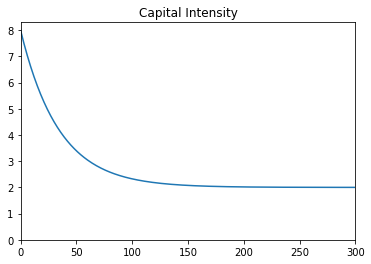

In [11]:
# show capital intensity:
solow_df.κ.plot()
# set the y-axis minimum to zoero, & tell python to show the plot:
plt.ylim(bottom=0)
plt.title('Capital Intensity')
plt.show()

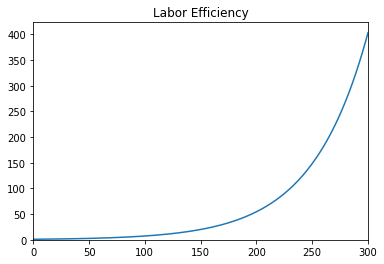

In [12]:
# show labor efficiency:
solow_df.E.plot()
# set the y-axis minimum to zoero, & tell python to show the plot:
plt.ylim(bottom=0)
plt.title('Labor Efficiency')
plt.show()

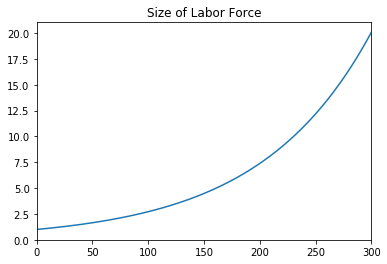

In [13]:
# show size of labor force:
solow_df.L.plot()
# set the y-axis minimum to zoero, & tell python to show the plot:
plt.ylim(bottom=0)
plt.title('Size of Labor Force')
plt.show()